# 2026 Pre-Season Testing Comparison

**Session 1:** Bahrain Test 1 — Day 2 (Feb 12, 2026)

**Session 2:** Bahrain Test 2 — Day 1 (Feb 18, 2026)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

## Session 1: Bahrain Test 1 — Day 2

In [2]:
# Setup plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

# Load Bahrain Test 1, Day 2
session1 = fastf1.get_testing_session(2026, 1, 2)
session1.load()

# Filter out box laps and inaccurate laps
laps1 = session1.laps.pick_wo_box()
laps1 = laps1[laps1['IsAccurate'] == True]

circuit_info = session1.get_circuit_info()

print(f'Session 1: {session1.event["EventName"]} - {session1.name}')
print(f'Loaded data for {len(session1.drivers)} drivers')
print(f'Accurate non-box laps: {len(laps1)}')

req         WARNING 	DEFAULT CACHE ENABLED! (2.53 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Pre-Season Testing - Practice 2 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	No lap data for driver 3
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '14'
core        WARNING 	Fixed incorrect tyre stint information for driver '1

Session 1: Pre-Season Testing - Practice 2
Loaded data for 22 drivers
Accurate non-box laps: 690


## Session 2: Bahrain Test 2 — Day 1

In [3]:
# Load Bahrain Test 2, Day 1
session2 = fastf1.get_testing_session(2026, 2, 1)
session2.load()

# Filter out box laps and inaccurate laps
laps2 = session2.laps.pick_wo_box()
laps2 = laps2[laps2['IsAccurate'] == True]

print(f'Session 2: {session2.event["EventName"]} - {session2.name}')
print(f'Loaded data for {len(session2.drivers)} drivers')
print(f'Accurate non-box laps: {len(laps2)}')

core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	No lap data for driver 3
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	Fixed incorrect tyre stint information for driver '12'
core        WARN

Session 2: Pre-Season Testing - Practice 1
Loaded data for 22 drivers
Accurate non-box laps: 646


## Cross-Session Telemetry Comparison

In [4]:
import f1analytics

# Build the sessions list as required by CrossSessionTelemetry:
# Each entry is a tuple: (session_obj, session_name, year, session_type)
sessions = [
    (session1, 'Bahrain Test 1 Day 2', 2026, 'Testing'),
    (session2, 'Bahrain Test 2 Day 1', 2026, 'Testing'),
]

# Create the analyzer
cross_session_t = f1analytics.cross_session_telemetry.CrossSessionTelemetry(sessions)

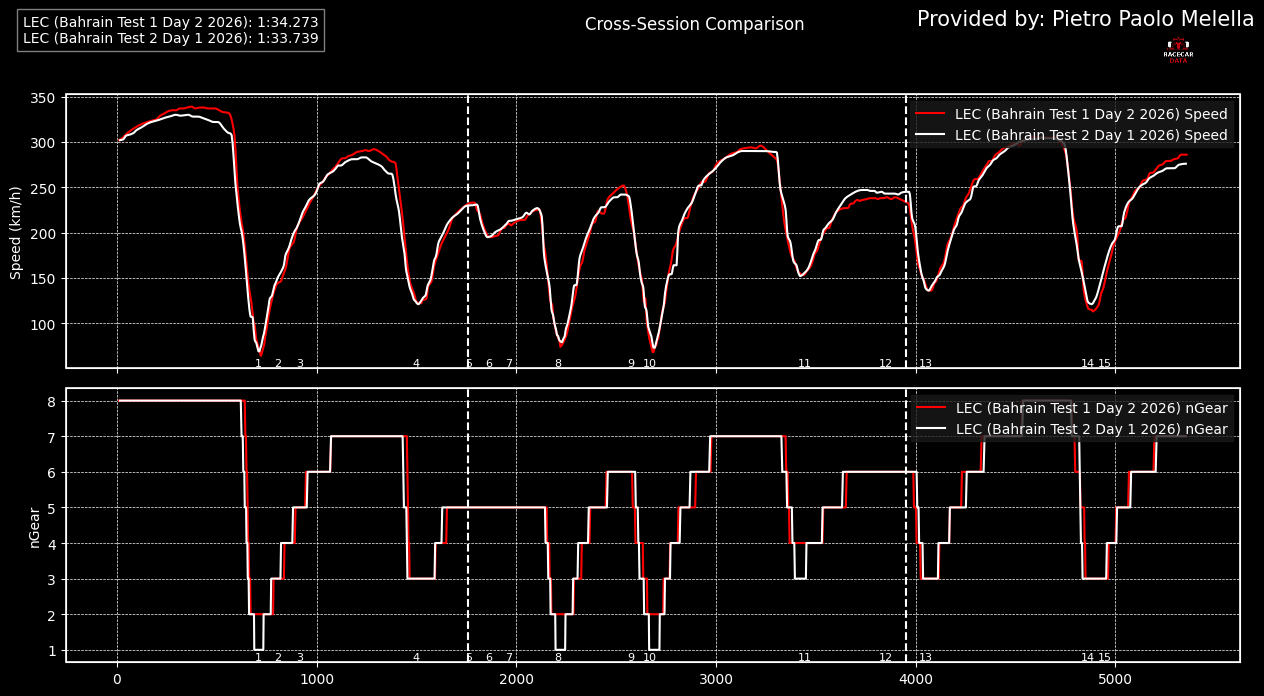

(<Figure size 1400x700 with 3 Axes>,
 array([<Axes: ylabel='Speed (km/h)'>, <Axes: ylabel='nGear'>],
       dtype=object))

In [9]:
# Compare fastest laps for a driver across the two test sessions
# session_drivers format: list of (session_index, driver_code)
# session_index 0 = Bahrain Test 1 Day 2
# session_index 1 = Bahrain Test 2 Day 1

cross_session_t.compare_laps([
    (0, 'LEC'),
    (1, 'LEC')
], channels=['Speed', 'nGear'])